### Step 1: Load dependencies

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
curr_dir = Path("__notebook__").parent.resolve()
sys.path.append(str(curr_dir.parent))
import bvcmap

### Step 2: Read in data
Here, we read in the 10x Visium BRCA dataset. The `x` and `y` values represent coordinates, and the `cancer` and `immune` values represent cell type proportions of cancer and immune cells, respectively.

In [2]:
df = pd.read_csv(curr_dir / "demo_data.csv", index_col=0)
df.head()

,cancer,immune,x,y
CGGTACTAGAATCAAA-1,-3.582754,0.986713,43,83
ACTGTGCTAGTAGATC-1,9.117906,1.972974,13,31
GAAACTCGTGCGATGC-1,-4.129408,0.100413,28,24
ATAGGTTGGGCAGATG-1,-2.775207,-0.218832,28,64
CTACGACTAGCTATAA-1,-7.275145,-1.579688,38,24


### Step 3: Initialize a BivariateCmap object
You can quickly visualize the colormap by displaying it, as shown here.

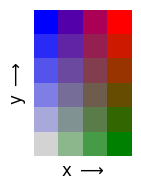

In [3]:
cmap = bvcmap.BivariateCmap.from_corner_colors(
    bottom_left_corner="lightgrey",
    top_left_corner="blue",
    top_right_corner="red",
    bottom_right_corner="green",
    bottom_to_top_dim=6,
    left_to_right_dim=4,
)
display(cmap)

### Step 4: Modify BivariateCmap object
You can also manually specify the color for specific heatmap boxes if desired.

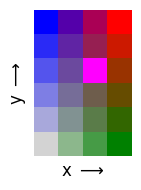

In [4]:
cmap.set_specific_box_color(
    bottom_to_top_index=3,
    left_to_right_index=2,
    color="#FF00FF",
    inplace=True,
)
display(cmap)

### Step 5: Make a scatterplot with the bivariate colormap

Two functions are all you need!

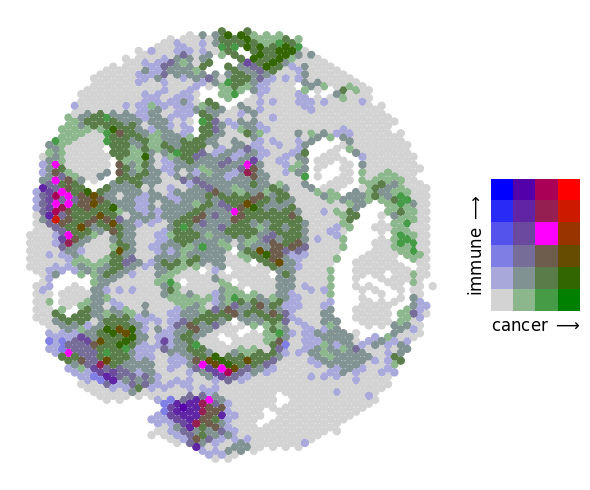

In [5]:
fig, axs = plt.subplots(figsize=(6, 5), width_ratios=(5/6, 1/6), ncols=2)
bvcmap.scatterplot(
    cmap=cmap,
    x=df["x"],
    y=df["y"],
    hue_x=df["cancer"],
    hue_y=df["immune"],
    hue_x_binning_method="equal",
    hue_y_binning_method="equal",
    erase_ticks=True,
    erase_ticklabels=True,
    erase_spines=True,
    s=25,
    ax=axs[0]
)
bvcmap.legend(
    cmap=cmap,
    ax=axs[1]
)
plt.close(fig)
fig

Object oriented methods are provided as well.

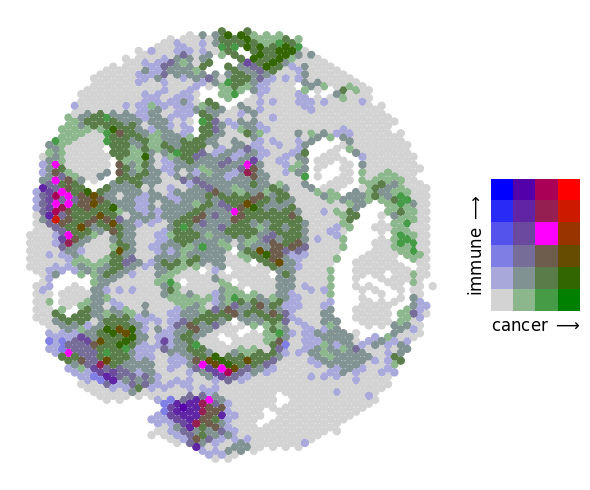

In [6]:
fig, axs = plt.subplots(figsize=(6, 5), width_ratios=(5/6, 1/6), ncols=2)
cmap.plot_scatterplot(
    x=df["x"],
    y=df["y"],
    hue_x=df["cancer"],
    hue_y=df["immune"],
    hue_x_binning_method="equal",
    hue_y_binning_method="equal",
    erase_ticks=True,
    erase_ticklabels=True,
    erase_spines=True,
    s=25,
    ax=axs[0]
)
cmap.plot_legend(
    ax=axs[1]
)
plt.close(fig)
fig

Tick labels can be included in the legend as needed, simply by providing the `hue_x` and `hue_y` values.

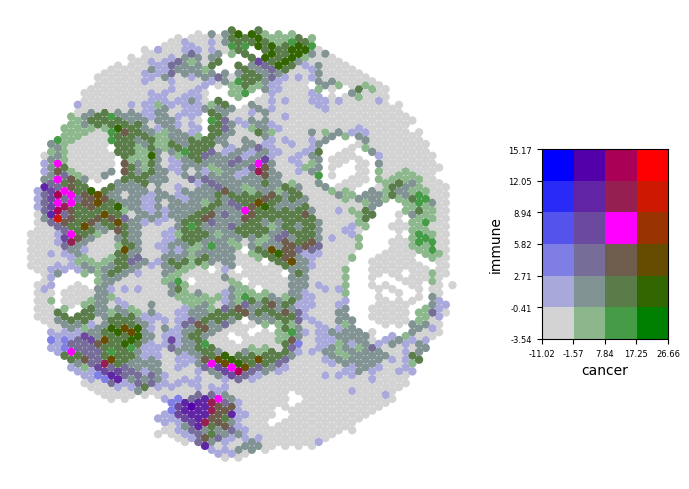

In [7]:
fig, axs = plt.subplots(figsize=(7, 5), width_ratios=(5.5/7, 1.5/7), ncols=2)
bvcmap.scatterplot(
    cmap=cmap,
    x=df["x"],
    y=df["y"],
    hue_x=df["cancer"],
    hue_y=df["immune"],
    hue_x_binning_method="equal",
    hue_y_binning_method="equal",
    s=25,
    ax=axs[0]
)
bvcmap.legend(
    cmap=cmap,
    hue_x=df["cancer"],
    hue_y=df["immune"],
    label_fontsize=10,
    tick_fontsize=6,
    ax=axs[1]
)
plt.close(fig)
fig

### `np.ndarray` representations 

Need the bivariate colormap for something else? Simply obtain `np.ndarray` representations.

`BivariateCmap.to_numpy()` returns a `(bottom_to_top_dim, left_to_right_dim, 4)`-shaped `np.ndarray`.
Each element in the `(bottom_to_top_dim, left_to_right_dim)` array is an RGBA vector.

In [8]:
cmap.to_numpy()

array([[[0.82745098, 0.82745098, 0.82745098, 1.        ],
        [0.55163399, 0.71895425, 0.55163399, 1.        ],
        [0.27581699, 0.61045752, 0.27581699, 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ]],

       [[0.66196078, 0.66196078, 0.86196078, 1.        ],
        [0.50797386, 0.5751634 , 0.57464052, 1.        ],
        [0.35398693, 0.48836601, 0.28732026, 1.        ],
        [0.2       , 0.40156863, 0.        , 1.        ]],

       [[0.49647059, 0.49647059, 0.89647059, 1.        ],
        [0.46431373, 0.43137255, 0.59764706, 1.        ],
        [0.43215686, 0.36627451, 0.29882353, 1.        ],
        [0.4       , 0.30117647, 0.        , 1.        ]],

       [[0.33098039, 0.33098039, 0.93098039, 1.        ],
        [0.42065359, 0.2875817 , 0.62065359, 1.        ],
        [1.        , 0.        , 1.        , 1.        ],
        [0.6       , 0.20078431, 0.        , 1.        ]],

       [[0.1654902 , 0.1654902 , 0.9654902 , 1.        ],
      

You can also directly compute the RGBA hue for each index.

In [11]:
cmap.compute_hues(
    hue_x=df["cancer"],
    hue_y=df["immune"],
    hue_x_binning_method="equal",
    hue_y_binning_method="equal",
)

CGGTACTAGAATCAAA-1    (0.6619607843137255, 0.6619607843137255, 0.861...
ACTGTGCTAGTAGATC-1    (0.35398692810457516, 0.4883660130718955, 0.28...
GAAACTCGTGCGATGC-1    (0.6619607843137255, 0.6619607843137255, 0.861...
ATAGGTTGGGCAGATG-1    (0.6619607843137255, 0.6619607843137255, 0.861...
CTACGACTAGCTATAA-1    (0.8274509803921568, 0.8274509803921568, 0.827...
                                            ...                        
TCGTCTTAGGCGTTAA-1    (0.8274509803921568, 0.8274509803921568, 0.827...
TGGAGTGATGCGATGA-1    (0.6619607843137255, 0.6619607843137255, 0.861...
TTCGGGACTAATCGCG-1    (0.5079738562091504, 0.5751633986928105, 0.574...
GTACTCCTGGGTATGC-1    (0.8274509803921568, 0.8274509803921568, 0.827...
ATTGTCGCAATACCTT-1    (0.8274509803921568, 0.8274509803921568, 0.827...
Length: 2518, dtype: object